In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statistics as st
import arviz as az
import bambi as bmb
import pymc as pm
from pymc import HalfNormal, Model, Normal, sample
import statsmodels.api as sm
import networkx as nx
import graphviz
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 12345
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

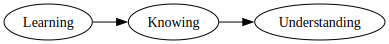

In [3]:
f = graphviz.Digraph()

# Definizione dei nodi e degli archi
f.edge("Learning", "Knowing")
f.edge("Knowing", "Understanding")

# Impostazione dell'orientamento orizzontale
f.attr(rankdir='LR')
f

In [4]:
n = 1000  # sample size

# Simulating the variables
X = np.random.normal(0, 1, n)  # Learning
C = 5 * X + np.random.normal(0, 1, n)  # Knowing
Y = 3 * C + np.random.normal(0, 1, n)  # Understanding

df = pd.DataFrame()
df["X"] = X
df["C"] = C
df["Y"] = Y

df.head()


,X,C,Y
0,-0.129270,-0.557809,-1.922953
1,0.795291,3.750399,11.755034
2,0.668207,4.568436,14.027978
3,-0.033613,-1.607287,-5.027095
4,-0.459799,-2.048635,-5.000575


In [5]:
mod1 = bmb.Model("Y ~ X", df)
results1 = mod1.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:06.564311


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1453.45it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1454.44it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1455.57it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1456.60it/s]


Sampling time = 0:00:01.738849


Transforming variables...


Transformation time = 0:00:00.073043


Computing Log Likelihood...


Log Likelihood time = 0:00:00.134660


In [6]:
az.summary(results1, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.01,0.10,-0.19,0.16,0.0,0.0,4071.86,2970.97,1.0
X,14.83,0.10,14.64,15.02,0.0,0.0,4153.62,3061.00,1.0
Y_sigma,3.08,0.07,2.96,3.21,0.0,0.0,4253.53,3039.15,1.0


In [7]:
mod2 = bmb.Model("Y ~ X + C", df)

In [8]:
results2 = mod2.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.860340


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:  50%|██████████████████████████                          | 1000/2000 [00:01<00:00, 9663.45it/s]

Running chain 0:  55%|████████████████████████████                       | 1100/2000 [00:01<00:00, 10353.45it/s]

Running chain 2:  55%|████████████████████████████                       | 1100/2000 [00:01<00:00, 10220.38it/s]

Running chain 3:  50%|██████████████████████████                          | 1000/2000 [00:01<00:00, 9206.05it/s]

Running chain 1:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:01<00:00, 9275.74it/s]

Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 9472.51it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1292.00it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1292.85it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1293.94it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1295.00it/s]


Sampling time = 0:00:01.622948


Transforming variables...


Transformation time = 0:00:00.043391


Computing Log Likelihood...


Log Likelihood time = 0:00:00.116632


In [9]:
az.summary(results2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.01,0.03,-0.04,0.08,0.0,0.0,2704.74,2228.19,1.0
X,-0.01,0.16,-0.29,0.29,0.0,0.0,1793.50,1986.23,1.0
C,2.99,0.03,2.94,3.05,0.0,0.0,1801.31,1930.41,1.0
Y_sigma,0.98,0.02,0.94,1.02,0.0,0.0,2550.37,1823.33,1.0


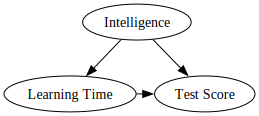

In [10]:
f = graphviz.Digraph()
with f.subgraph() as s:
    s.attr(rank='same')
    s.node("Learning Time")
    s.node("Test Score")

f.node("Intelligence")
f.edge("Intelligence", "Learning Time")
f.edge("Intelligence", "Test Score")
f.edge("Learning Time", "Test Score")

f

In [11]:
n = 1000  # sample size

# Simulating the variables
I = np.random.normal(100, 15, n)  # Intelligence
T = 200 - I + np.random.normal(0, 1, n)  # Learning Time
S = 0.5 * I + 0.1 * T + np.random.normal(0, 1, n)  # Test Score

df = pd.DataFrame()
df["I"] = I
df["T"] = T
df["S"] = S

df.head()

,I,T,S
0,84.427329,115.021567,53.249913
1,87.976192,111.357800,57.035614
2,115.645446,83.614127,66.009318
3,95.894181,102.669591,59.199222
4,116.965758,83.811142,67.409589


In [12]:
mod3 = bmb.Model("S ~ T", df)
results3 = mod3.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.820146


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1549.53it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1550.63it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1552.22it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1553.56it/s]


Sampling time = 0:00:01.360348


Transforming variables...


Transformation time = 0:00:00.038488


Computing Log Likelihood...


Log Likelihood time = 0:00:00.103982


In [13]:
az.summary(results3, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,100.53,0.25,100.08,101.01,0.0,0.0,4758.50,2994.79,1.0
T,-0.40,0.00,-0.41,-0.40,0.0,0.0,5002.24,3236.68,1.0
S_sigma,1.15,0.03,1.10,1.20,0.0,0.0,2720.81,2238.23,1.0


In [14]:
mod4 = bmb.Model("S ~ T + I", df)
results4 = mod4.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.638959


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3855.76it/s]

Running chain 1:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3615.03it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3394.18it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3239.78it/s]

Running chain 1:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 3779.09it/s]

Running chain 0:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 3583.59it/s]

Running chain 3:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 3607.11it/s]

Running chain 2:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 3573.91it/s]

Running chain 1:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 3868.41it/s]

Running chain 2:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 3707.85it/s]

Running chain 3:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 3601.70it/s]

Running chain 0:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 3477.26it/s]

Running chain 1:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 3766.41it/s]

Running chain 2:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 3721.43it/s]

Running chain 3:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 3601.94it/s]

Running chain 0:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 3410.53it/s]

Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 3688.28it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 3602.31it/s]

Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 3591.54it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 3296.81it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 989.83it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 990.24it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 990.73it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 991.25it/s]


Sampling time = 0:00:02.096278


Transforming variables...


Transformation time = 0:00:00.044403


Computing Log Likelihood...


Log Likelihood time = 0:00:00.111262


In [15]:
az.summary(results4, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-5.70,6.42,-17.51,6.67,0.17,0.12,1509.33,1674.94,1.0
T,0.13,0.03,0.06,0.18,0.00,0.00,1515.74,1644.29,1.0
I,0.53,0.03,0.47,0.59,0.00,0.00,1506.64,1685.72,1.0
S_sigma,1.02,0.02,0.98,1.06,0.00,0.00,2239.80,1870.36,1.0


In [16]:
n = 1000  # Sample Size
network = np.random.normal(size=n)
competence = np.random.normal(size=n)

promotion = ((network > 1) | (competence > 1)).astype(int)
luck = np.random.binomial(1, 0.05, size=n)
promotion = (1 - luck) * promotion + luck * (1 - promotion)

df = pd.DataFrame()
df["P"] = promotion
df["N"] = network
df["C"] = competence

df.head()

,P,N,C
0,1,-0.433042,1.382778
1,0,0.830730,0.038152
2,1,-0.585725,1.713581
3,1,1.952125,0.049243
4,0,0.136216,-0.948111


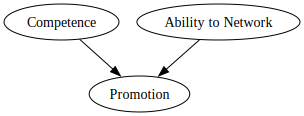

In [17]:
f = graphviz.Digraph()
f.edge("Competence", "Promotion")
f.edge("Ability to Network", "Promotion")
f

In [18]:
mod5 = bmb.Model("C ~ N", df)
results5 = mod5.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.723460


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1577.08it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1578.21it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1579.89it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1581.48it/s]


Sampling time = 0:00:01.339160


Transforming variables...


Transformation time = 0:00:00.039385


Computing Log Likelihood...


Log Likelihood time = 0:00:00.224507


In [19]:
az.summary(results5, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.01,0.03,-0.05,0.08,0.0,0.0,3763.41,2975.61,1.0
N,0.02,0.03,-0.04,0.08,0.0,0.0,4079.31,2619.31,1.0
C_sigma,1.04,0.02,1.00,1.09,0.0,0.0,4094.69,2918.14,1.0


In [20]:
mod6 = bmb.Model("C ~ N + P", df)
results6 = mod6.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.648857


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1453.74it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1454.71it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1455.89it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1457.29it/s]


Sampling time = 0:00:01.450448


Transforming variables...


Transformation time = 0:00:00.044004


Computing Log Likelihood...


Log Likelihood time = 0:00:00.111951


In [21]:
az.summary(results6, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.35,0.04,-0.42,-0.28,0.0,0.0,4168.85,3016.38,1.0
N,-0.15,0.03,-0.21,-0.09,0.0,0.0,3624.26,2814.12,1.0
P,1.06,0.07,0.94,1.18,0.0,0.0,3831.85,2771.85,1.0
C_sigma,0.93,0.02,0.89,0.97,0.0,0.0,4034.74,3315.56,1.0


In [22]:
only_promoted = df.loc[df["P"] == 1]

In [23]:
mod7 = bmb.Model("C ~ N", only_promoted)
results7 = mod7.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.865819


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1632.64it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1633.66it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1635.18it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1636.83it/s]


Sampling time = 0:00:01.298380


Transforming variables...


Transformation time = 0:00:00.038859


Computing Log Likelihood...


Log Likelihood time = 0:00:00.110403


In [24]:
az.summary(results7, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.81,0.06,0.69,0.93,0.0,0.0,4462.65,3080.90,1.0
N,-0.38,0.05,-0.47,-0.28,0.0,0.0,4202.44,3129.57,1.0
C_sigma,1.07,0.04,0.99,1.15,0.0,0.0,4304.93,2852.77,1.0


In [25]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Tue Jan 30 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

pymc       : 5.10.3
pandas     : 2.1.4
seaborn    : 0.13.0
graphviz   : 0.20.1
arviz      : 0.17.0
numpy      : 1.26.2
statsmodels: 0.14.1
bambi      : 0.13.0
matplotlib : 3.8.2
networkx   : 3.2.1
scipy      : 1.11.4

Watermark: 2.4.3

